# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

In [2]:
movie_title_df = pd.read_csv('Movie_Id_Titles')
movie_title_df.head(5)

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [3]:
movie_rating_df = pd.read_csv('u.data')
movie_rating_df.head(5)

,0\t50\t5\t881250949
0,0\t172\t5\t881250949
1,0\t133\t1\t881250949
2,196\t242\t3\t881250949
3,186\t302\t3\t891717742
4,22\t377\t1\t878887116


In [4]:
# Data is not in proper format

movie_rating_df = pd.read_csv('u.data', sep = '\t', names = ['user_id','item_id', 'rating', 'timestamp'])
movie_rating_df.head(5)

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [5]:
# Dropping timestamp column

movie_rating_df = movie_rating_df.drop(['timestamp'], axis = 1)
movie_rating_df.head(5)

,user_id,item_id,rating
0,0,50,5
1,0,172,5
2,0,133,1
3,196,242,3
4,186,302,3


In [6]:
print("Describe : ", movie_rating_df.describe() ) 
print("Info : ", movie_rating_df.info() )

Describe :               user_id        item_id         rating
count  100003.000000  100003.000000  100003.000000
mean      462.470876     425.520914       3.529864
std       266.622454     330.797791       1.125704
min         0.000000       1.000000       1.000000
25%       254.000000     175.000000       3.000000
50%       447.000000     322.000000       4.000000
75%       682.000000     631.000000       4.000000
max       943.000000    1682.000000       5.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user_id  100003 non-null  int64
 1   item_id  100003 non-null  int64
 2   rating   100003 non-null  int64
dtypes: int64(3)
memory usage: 2.3 MB
Info :  None


In [7]:
# Combining both df

movies_rating_df = pd.merge(movie_rating_df, movie_title_df, on = 'item_id')
movies_rating_df.head(5)

,user_id,item_id,rating,title
0,0,50,5,Star Wars (1977)
1,290,50,5,Star Wars (1977)
2,79,50,4,Star Wars (1977)
3,2,50,5,Star Wars (1977)
4,8,50,5,Star Wars (1977)


# Visualize Dataset

In [8]:
# Grouping by movie title and looking the details

movies_rating_df.groupby('title').describe()

user_id                                 \
                                        count        mean         std    min   
title                                                                          
'Til There Was You (1997)                 9.0  383.777778  204.272354  152.0   
1-900 (1994)                              5.0  477.000000  244.344020  181.0   
101 Dalmatians (1996)                   109.0  450.330275  295.142779    1.0   
12 Angry Men (1957)                     125.0  453.552000  255.588677    1.0   
187 (1997)                               41.0  517.097561  241.098300    3.0   
...                                       ...         ...         ...    ...   
Young Guns II (1990)                     44.0  504.068182  254.101371   87.0   
Young Poisoner's Handbook, The (1995)    41.0  452.487805  286.352241    7.0   
Zeus and Roxanne (1997)                   6.0  532.833333  343.690219   82.0   
unknown                                   9.0  311.888889  264.160200    1.0   
Á köldum klaka (Cold Fever) (1994)        1.0  655.000000         NaN  655.0   

                                                                  item_id  \
                                         25%    50%    75%    max   count   
title                                                                       
'Til There Was You (1997)              223.0  342.0  530.0  782.0     9.0   
1-900 (1994)                           385.0  405.0  581.0  833.0     5.0   
101 Dalmatians (1996)                  183.0  435.0  699.0  938.0   109.0   
12 Angry Men (1957)                    268.0  429.0  661.0  932.0   125.0   
187 (1997)                             416.0  532.0  698.0  894.0    41.0   
...                                      ...    ...    ...    ...     ...   
Young Guns II (1990)                   301.0  459.0  732.5  943.0    44.0   
Young Poisoner's Handbook, The (1995)  246.0  473.0  634.0  936.0    41.0   
Zeus and Roxanne (1997)                251.5  627.5  796.5  881.0     6.0   
unknown                                130.0  297.0  422.0  833.0     9.0   
Á köldum klaka (Cold Fever) (1994)     655.0  655.0  655.0  655.0     1.0   

                                               ...                 rating  \
                                         mean  ...     75%     max  count   
title                                          ...                          
'Til There Was You (1997)              1300.0  ...  1300.0  1300.0    9.0   
1-900 (1994)                           1353.0  ...  1353.0  1353.0    5.0   
101 Dalmatians (1996)                   225.0  ...   225.0   225.0  109.0   
12 Angry Men (1957)                     178.0  ...   178.0   178.0  125.0   
187 (1997)                              330.0  ...   330.0   330.0   41.0   
...                                       ...  ...     ...     ...    ...   
Young Guns II (1990)                   1188.0  ...  1188.0  1188.0   44.0   
Young Poisoner's Handbook, The (1995)   547.0  ...   547.0   547.0   41.0   
Zeus and Roxanne (1997)                1164.0  ...  1164.0  1164.0    6.0   
unknown                                 267.0  ...   267.0   267.0    9.0   
Á köldum klaka (Cold Fever) (1994)     1633.0  ...  1633.0  1633.0    1.0   

                                                                           \
                                           mean       std  min   25%  50%   
title                                                                       
'Til There Was You (1997)              2.333333  1.000000  1.0  2.00  2.0   
1-900 (1994)                           2.600000  1.516575  1.0  1.00  3.0   
101 Dalmatians (1996)                  2.908257  1.076184  1.0  2.00  3.0   
12 Angry Men (1957)                    4.344000  0.719588  2.0  4.00  4.0   
187 (1997)                             3.024390  1.172344  1.0  2.00  3.0   
...                                         ...       ...  ...   ...  ...   
Young Guns II (1990)                   2.772727  1.008421  1.0  2.

In [9]:
# Just seeing rating details alone 

movies_rating_df.groupby('title')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
title,,,,,,,,
'Til There Was You (1997),9.0,2.333333,1.000000,1.0,2.00,2.0,3.0,4.0
1-900 (1994),5.0,2.600000,1.516575,1.0,1.00,3.0,4.0,4.0
101 Dalmatians (1996),109.0,2.908257,1.076184,1.0,2.00,3.0,4.0,5.0
12 Angry Men (1957),125.0,4.344000,0.719588,2.0,4.00,4.0,5.0,5.0
187 (1997),41.0,3.024390,1.172344,1.0,2.00,3.0,4.0,5.0
...,...,...,...,...,...,...,...,...
Young Guns II (1990),44.0,2.772727,1.008421,1.0,2.00,3.0,3.0,5.0
"Young Poisoner's Handbook, The (1995)",41.0,3.341463,1.237129,1.0,3.00,4.0,4.0,5.0
Zeus and Roxanne (1997),6.0,2.166667,0.983192,1.0,1.25,2.5,3.0,3.0


In [10]:
ratings_df_mean = movies_rating_df.groupby('title')['rating'].describe()['mean']
ratings_df_mean.head(5)

title
'Til There Was You (1997)    2.333333
1-900 (1994)                 2.600000
101 Dalmatians (1996)        2.908257
12 Angry Men (1957)          4.344000
187 (1997)                   3.024390
Name: mean, dtype: float64

In [11]:
ratings_df_count = movies_rating_df.groupby('title')['rating'].describe()['count']
ratings_df_count.head(5)

title
'Til There Was You (1997)      9.0
1-900 (1994)                   5.0
101 Dalmatians (1996)        109.0
12 Angry Men (1957)          125.0
187 (1997)                    41.0
Name: count, dtype: float64

In [12]:
ratings_df = pd.merge(ratings_df_mean, ratings_df_count, on = 'title')
ratings_df.head(5)

,mean,count
title,,
'Til There Was You (1997),2.333333,9.0
1-900 (1994),2.600000,5.0
101 Dalmatians (1996),2.908257,109.0
12 Angry Men (1957),4.344000,125.0
187 (1997),3.024390,41.0


In [13]:
ratings_df.reset_index()

,title,mean,count
0,'Til There Was You (1997),2.333333,9.0
1,1-900 (1994),2.600000,5.0
2,101 Dalmatians (1996),2.908257,109.0
3,12 Angry Men (1957),4.344000,125.0
4,187 (1997),3.024390,41.0
...,...,...,...
1659,Young Guns II (1990),2.772727,44.0
1660,"Young Poisoner's Handbook, The (1995)",3.341463,41.0
1661,Zeus and Roxanne (1997),2.166667,6.0
1662,unknown,3.444444,9.0


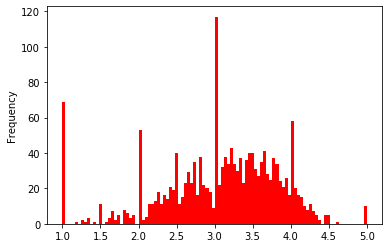

In [14]:
# Plot histogram for mean

ratings_df['mean'].plot(bins = 100, kind = 'hist', color = 'r')

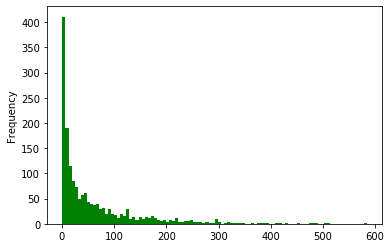

In [15]:
# Plot histogram for count

ratings_df['count'].plot(bins = 100, kind = 'hist', color = 'g')

In [16]:
# List of movies that is purely 5 stars ( mean = 5 )
ratings_df [ ratings_df['mean'] == 5]

,mean,count
title,,
Aiqing wansui (1994),5.0,1.0
Entertaining Angels: The Dorothy Day Story (1996),5.0,1.0
"Great Day in Harlem, A (1994)",5.0,1.0
Marlene Dietrich: Shadow and Light (1996),5.0,1.0
Prefontaine (1997),5.0,3.0
"Saint of Fort Washington, The (1993)",5.0,2.0
Santa with Muscles (1996),5.0,2.0
Someone Else's America (1995),5.0,1.0
Star Kid (1997),5.0,3.0


In [17]:
# Viewing Best Movie -- ( Sorting by count-descending --> Picking top 100 records --> Sort by mean-descending -- > BEST MOVIE !!!)
ratings_df.sort_values('count', ascending=False).head(100).sort_values('mean', ascending = False)

,mean,count
title,,
Schindler's List (1993),4.466443,298.0
Casablanca (1942),4.456790,243.0
"Shawshank Redemption, The (1994)",4.445230,283.0
"Usual Suspects, The (1995)",4.385768,267.0
Star Wars (1977),4.359589,584.0
...,...,...
Murder at 1600 (1997),3.087156,218.0
Broken Arrow (1996),3.031496,254.0
Evita (1996),2.980695,259.0


# Perform Item-Based Collaborative Filtering on one Movie

In [18]:
# Create user-title matrix using pivot table

userid_movietitle_matrix = movies_rating_df.pivot_table(index='user_id', columns='title', values='rating')

In [19]:
# Viewing Titanic ratings 

titanic = userid_movietitle_matrix['Titanic (1997)']
titanic

user_id
0      NaN
1      NaN
2      5.0
3      NaN
4      NaN
      ... 
939    NaN
940    5.0
941    NaN
942    3.0
943    NaN
Name: Titanic (1997), Length: 944, dtype: float64

In [20]:
titanic_correlations = pd.DataFrame(userid_movietitle_matrix.corrwith(titanic), columns=['Correlations'])
titanic_correlations.head()

C:\Anaconda\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Anaconda\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlations
title,
'Til There Was You (1997),-0.062017
1-900 (1994),NaN
101 Dalmatians (1996),0.120113
12 Angry Men (1957),0.077700
187 (1997),0.315654


In [21]:
titanic_correlations = titanic_correlations.join(ratings_df['count'])
titanic_correlations.dropna(inplace = True)
titanic_correlations.head()

,Correlations,count
title,,
'Til There Was You (1997),-0.062017,9.0
101 Dalmatians (1996),0.120113,109.0
12 Angry Men (1957),0.077700,125.0
187 (1997),0.315654,41.0
2 Days in the Valley (1996),0.017295,93.0


In [22]:
titanic_correlations.sort_values('Correlations', ascending = False)

,Correlations,count
title,,
Nadja (1994),1.0,8.0
"Pest, The (1997)",1.0,8.0
"Savage Nights (Nuits fauves, Les) (1992)",1.0,3.0
For Ever Mozart (1996),1.0,3.0
"Jerky Boys, The (1994)",1.0,3.0
...,...,...
Pather Panchali (1955),-1.0,8.0
Angel Baby (1995),-1.0,4.0
Blood Beach (1981),-1.0,6.0


In [24]:
titanic_correlations[titanic_correlations['count']>80].sort_values('Correlations', ascending = False)

,Correlations,count
title,,
Titanic (1997),1.000000,350.0
"River Wild, The (1994)",0.497600,146.0
"Abyss, The (1989)",0.472103,151.0
Bram Stoker's Dracula (1992),0.443560,120.0
True Lies (1994),0.435104,208.0
...,...,...
Brazil (1985),-0.243532,208.0
Richard III (1995),-0.275451,89.0
Cold Comfort Farm (1995),-0.307150,125.0


# Create an Item-Based Collaborative Filter on the entire Dataset - Full Movie Recommendation

In [25]:
movie_correlations = userid_movietitle_matrix.corr(method='pearson', min_periods=80)
movie_correlations.head(10)

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12 Angry Men (1957),NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.178848,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187 (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2 Days in the Valley (1996),NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"20,000 Leagues Under the Sea (1954)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001: A Space Odyssey (1968),NaN,NaN,NaN,0.178848,NaN,NaN,NaN,1.000000,NaN,NaN,...,NaN,NaN,NaN,-0.001307,NaN,NaN,NaN,NaN,NaN,NaN
3 Ninjas: High Noon At Mega Mountain (1998),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# Recommending movies based on my ratings (My ratings are in csv file)

myRatings = pd.read_csv('My_Ratings.csv')
myRatings.head(5)

,Movie Name,Ratings
0,Liar Liar (1997),5
1,Star Wars (1977),1


In [27]:
similar_movies_list = pd.Series()

for i in range (0,2) : 
    similar_movies = movie_correlations[myRatings['Movie Name'][i]].dropna()
    similar_movies = similar_movies.map(lambda x: x*myRatings['Ratings'][i])
    similar_movies_list = similar_movies_list.append(similar_movies)

similar_movies_list.sort_values(inplace = True, ascending = False)
similar_movies_list.head(10)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


Liar Liar (1997)                             5.000000
Con Air (1997)                               2.349141
Pretty Woman (1990)                          2.348951
Michael (1996)                               2.210110
Indiana Jones and the Last Crusade (1989)    2.072136
Top Gun (1986)                               2.028602
G.I. Jane (1997)                             1.989656
Multiplicity (1996)                          1.984302
Grumpier Old Men (1995)                      1.953494
Ghost and the Darkness, The (1996)           1.895376
dtype: float64